# Polynomial regression

### Let's define the function!

\\( y = a_2x^2 + a_1x + a_0 \\)

<IPython.core.display.Javascript object>


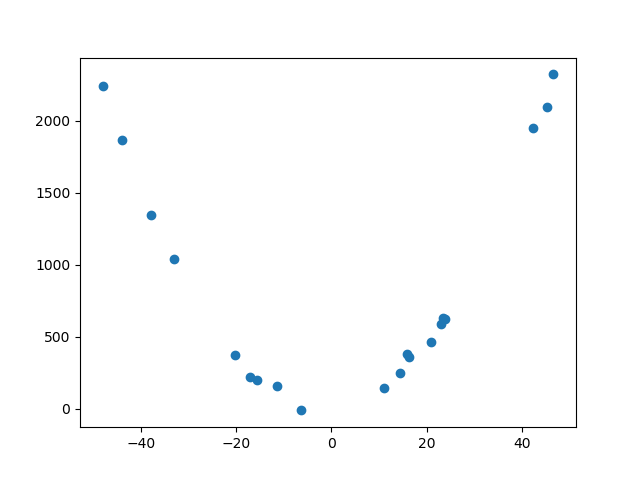

In [18]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Noise mean and standart deviation
mu, sigma = 0, 40

# Range of input values
range_min = -50
range_max = 50

# Number of examples to use for training
samples = 20

# The "ground-truth" function
a0 = 1
a1 = 2
a2 = 1
f = lambda x: a2*x**2 + a1*x + a0

# Input values
x = np.random.uniform(range_min, range_max, samples)

# Output values with added noise
y = f(x) + np.random.normal(mu, sigma, samples)

#for in_out in zip(x, y):
#    print("X :{0:.2f} \tY:{1:.2f}".format(in_out[0], in_out[1]))

fig1, ax1 = plt.subplots()
ax1.scatter(x,y)
fig1.show()

In [19]:
print(x)

print(x.shape)

x_pow = x**2

print(x_pow)

x = np.dstack((x,x_pow))

print(x)
print(x.shape)

x = x[0,:,:]
print(x.shape)

[ 42.48610986  11.09293403 -17.17017018 -38.03254461  20.96961452
  46.69739812 -48.14424425 -33.07018961  16.32133678  15.97402452
  14.49389147 -11.36837198  23.02914335  45.26752751 -20.19362753
  23.85283197 -44.14530253  -6.32928801 -15.68554925  23.42459591]
(20,)
[1805.06953138  123.05318543  294.81474399 1446.47444937  439.72473328
 2180.64699082 2317.86825481 1093.63744106  266.38603428  255.16945946
  210.07289002  129.23988141  530.34144325 2049.14904652  407.78259295
  568.95759296 1948.80773564   40.05988674  246.0364552   548.71169346]
[[[  42.48610986 1805.06953138]
  [  11.09293403  123.05318543]
  [ -17.17017018  294.81474399]
  [ -38.03254461 1446.47444937]
  [  20.96961452  439.72473328]
  [  46.69739812 2180.64699082]
  [ -48.14424425 2317.86825481]
  [ -33.07018961 1093.63744106]
  [  16.32133678  266.38603428]
  [  15.97402452  255.16945946]
  [  14.49389147  210.07289002]
  [ -11.36837198  129.23988141]
  [  23.02914335  530.34144325]
  [  45.26752751 2049.149046

---------------------------------------------------------------------------------

### Define the single-neuron network without non-linerity

In [20]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(1,2))
preds = Dense(1,activation='linear')(inputs)
model = Model(inputs=inputs,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 2)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


---------------------------------------------------------------------------------

### Set training settings and callbacks

In [21]:
# Print the batch number at the beginning of every batch.
weight_log = []
weight_log_callback = keras.callbacks.LambdaCallback(on_epoch_end=lambda batch,logs: weight_log.append([model.layers[1].get_weights()[0][0][0], model.layers[1].get_weights()[1][0]]))

# Define optimization algorithm
sgd = keras.optimizers.SGD(lr=0.0000001)
adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(optimizer=adam ,loss='mse')

---------------------------------------------------------------------------------

### Start training

In [22]:
# Start training
model.fit(x,y, batch_size=1, epochs=100, shuffle=False, callbacks=[weight_log_callback])

ValueError: Error when checking input: expected input_2 to have 3 dimensions, but got array with shape (20, 2)

-----------------------------------------------------------------------------------------------------------------------------

### Animate training 

<IPython.core.display.Javascript object>


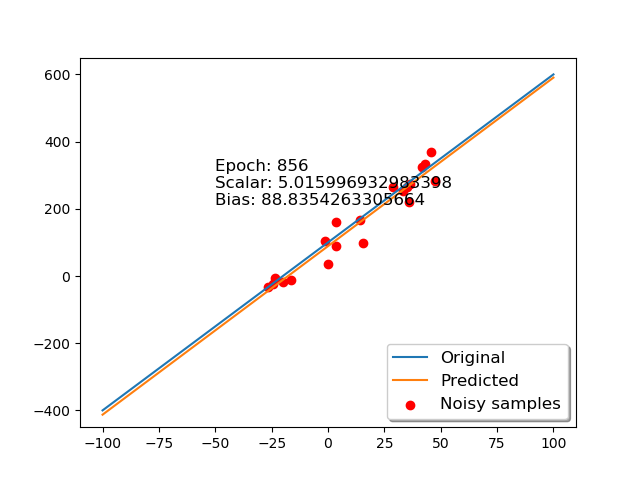

In [5]:
test_input = np.linspace(range_min*2, range_max*2)
weights = model.layers[1].get_weights()
tmp_model = model

import matplotlib.animation

fig2, ax2 = plt.subplots()
ax2.scatter(x,y, c='r', label='Noisy samples')
ax2.plot(test_input, f(slope, bias, test_input), label='Original')
data, = ax2.plot([], [], label='Predicted')
text = ax2.text(range_min, f(slope, bias, range_max)-140, '', fontsize='large')
ax2.legend(loc='lower right', shadow=True, fontsize='large')

def animate(frame, data, weight_log, text):
    weights[0][0] = weight_log[frame][0]
    weights[1][0] = weight_log[frame][1]
    tmp_model.layers[1].set_weights(weights)
    data.set_data(test_input, tmp_model.predict(test_input))
    text.set_text("Epoch: {}\nScalar: {}\nBias: {}".format(frame, weight_log[frame][0], weight_log[frame][1]))
    return data, text,
    
ani = matplotlib.animation.FuncAnimation(fig2, animate, frames=len(weight_log), fargs=(data, weight_log, text), interval=100, repeat=True, blit=True)
fig2.show()

-----------------------------------------------------------------------------------------------------------------------------

### Plot slope and bias during training

<IPython.core.display.Javascript object>


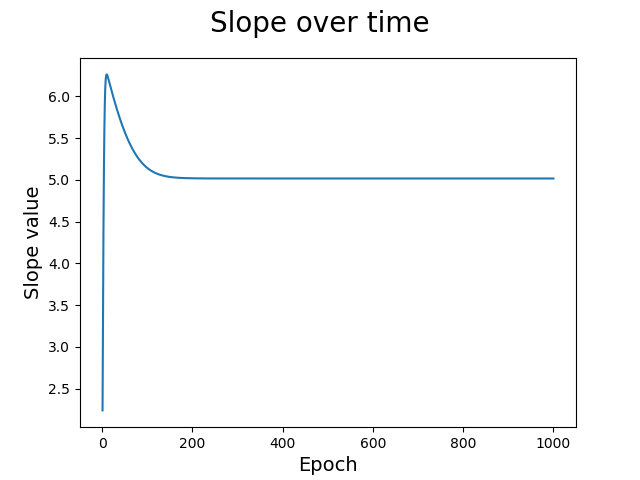

<IPython.core.display.Javascript object>


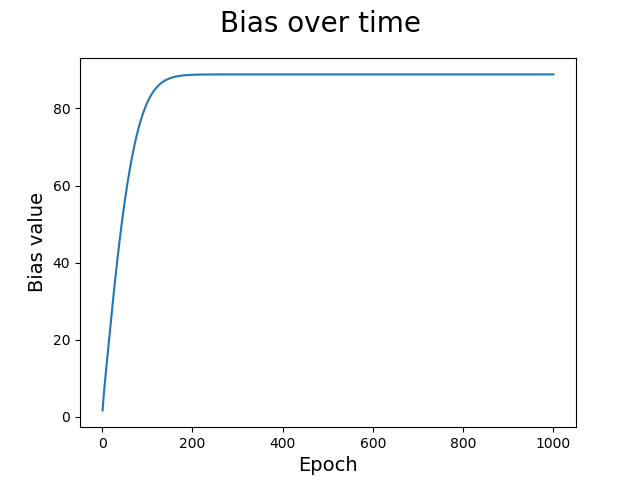

In [6]:
fig3, ax3 = plt.subplots()
a = np.array(weight_log)
epochs = a.shape[0]
ax3.plot(np.linspace(1,epochs,epochs), a[:,0])
fig3.suptitle('Slope over time', fontsize=20)
ax3.set_xlabel('Epoch', fontsize=14)
ax3.set_ylabel('Slope value', fontsize=14)
fig3.show()

fig4, ax4 = plt.subplots()
a = np.array(weight_log)
epochs = a.shape[0]
ax4.plot(np.linspace(1,epochs,epochs), a[:,1])
fig4.suptitle('Bias over time', fontsize=20)
ax4.set_xlabel('Epoch', fontsize=14)
ax4.set_ylabel('Bias value', fontsize=14)
fig4.show()

-----------------------------------------------------------------------------------------------------------------------------

### Calculate and visualize cost function for given function

<IPython.core.display.Javascript object>


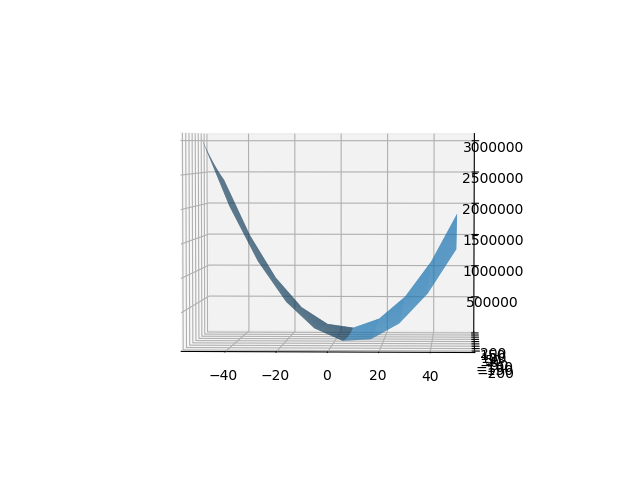

In [8]:
from sklearn.metrics import mean_squared_error

slope_points = 10
bias_points = 40
loss = np.zeros((bias_points, slope_points), dtype='float32')
s = np.linspace(-50, 50, slope_points)
b = np.linspace(-200, 200, bias_points)
for i, sl in enumerate(s):
    for j, bs in enumerate(b):
        weights[0][0] = sl
        weights[1][0] = bs
        tmp_model.layers[1].set_weights(weights)
        loss[j,i] = mean_squared_error(y, tmp_model.predict(x))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

S, B = np.meshgrid(s, b)
ax.plot_surface(S, B, loss)

plt.show()